In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
def selectBest(data, jump):
    indexes = data.index
    for i in range(indexes[0], indexes[-1], jump):
        print(i)
        indice_inicial = i
        indice_final = i + jump - 1

        subconjunto = data.loc[indice_inicial:indice_final]
        indice_maximo = subconjunto['weighted_avg'].nlargest(1).index

        print(data.loc[indice_maximo, "Another_Info"])

In [3]:
df = pd.read_csv("final_results.csv")
df.loc[((df['Method'] == "Reweighing") & (df['Another_Info'] == "No Reweighing")), 'Method'] = "BaseRL"
# Imprimindo o dataset ordenado
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Adult")], 11) #=> 1
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "German")], 11) #=> 0.2
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Compas")], 11) #=> 0.8
df

,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
0,0.586821,0.127198,0.0,DisparactImpactRemover,Adult,0.650160
1,0.586708,0.112494,0.1,DisparactImpactRemover,Adult,0.670217
2,0.586573,0.106573,0.2,DisparactImpactRemover,Adult,0.678235
3,0.581455,0.085569,0.3,DisparactImpactRemover,Adult,0.703639
4,0.578514,0.072411,0.4,DisparactImpactRemover,Adult,0.719727
...,...,...,...,...,...,...
343,0.617341,0.084904,With Reweighing,Reweighing,Compas,0.728039
344,0.610304,0.231155,No Reweighing,BaseRL,Compas,0.523210
345,0.619112,0.091275,With Reweighing,Reweighing,Compas,0.720476
346,0.649891,0.189088,No Reweighing,BaseRL,Compas,0.606714


In [4]:
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Adult")], 3) #=> 25
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "German")], 3) #=> 0.1
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Compas")], 3) #=> 25

In [5]:
df = df.drop((df.loc[(df['Another_Info'] != "1.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.2") & (df["Data_Name"] =="German") & (df["Method"] =="DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.8") & (df["Data_Name"] =="Compas") & (df["Method"] =="DisparactImpactRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "best eta = 10 ") & (df["Data_Name"] =="Adult") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="German") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="Compas") & (df["Method"] == "Optimizer")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.1") & (df["Data_Name"] =="German") & (df["Method"] =="PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Compas") & (df["Method"] =="PrejudiceRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] == "Test No Change") & (df["Method"] == "RejectClass")]).index)

df['Another_Info'].value_counts() # OK

Another_Info
Test with Change    15
No Reweighing       15
With Reweighing     15
best eta = 0.01     10
25.0                10
1.0                  5
0.2                  5
0.8                  5
best eta = 10        5
0.1                  5
Name: count, dtype: int64

In [6]:
ordem_desejada = ["BaseRL", "Reweighing", "DisparactImpactRemover", "Optimizer", "PrejudiceRemover" , "RejectClass"]

# Ordenando o dataset de acordo com a coluna e a ordem desejada
df = df.sort_values(by="Method", key=lambda x: x.map(ordem_desejada.index))
df

,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
332,0.784946,-0.134921,No Reweighing,BaseRL,German,0.769274
320,0.681223,0.352529,No Reweighing,BaseRL,Adult,0.403468
322,0.687655,0.359610,No Reweighing,BaseRL,Adult,0.397983
324,0.686888,0.336566,No Reweighing,BaseRL,Adult,0.429030
326,0.682592,0.347759,No Reweighing,BaseRL,Adult,0.410894
...,...,...,...,...,...,...
311,0.639821,0.026003,Test with Change,RejectClass,Compas,0.823391
313,0.656669,0.062852,Test with Change,RejectClass,Compas,0.783973
315,0.666134,0.102096,Test with Change,RejectClass,Compas,0.736441
291,0.319684,0.046998,Test with Change,RejectClass,Adult,0.585097


<Axes: xlabel='Method', ylabel='F1-Score'>

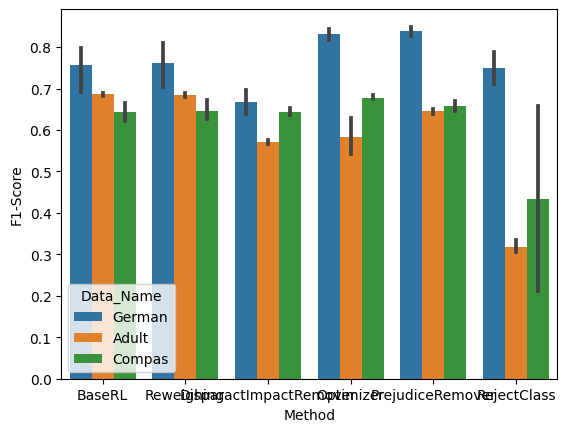

In [7]:
sns.barplot(df, x = "Method", y = "F1-Score", hue = "Data_Name" ,palette='tab10')

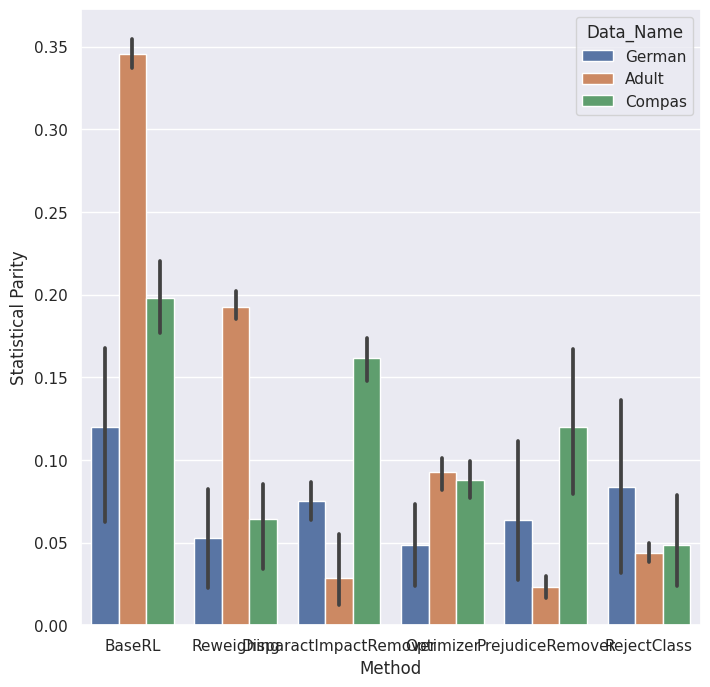

In [8]:
df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
sns.barplot(df, x = "Method", y = "Statistical Parity", hue = "Data_Name" , width=0.8)
plt.show()

<Figure size 900x800 with 0 Axes>

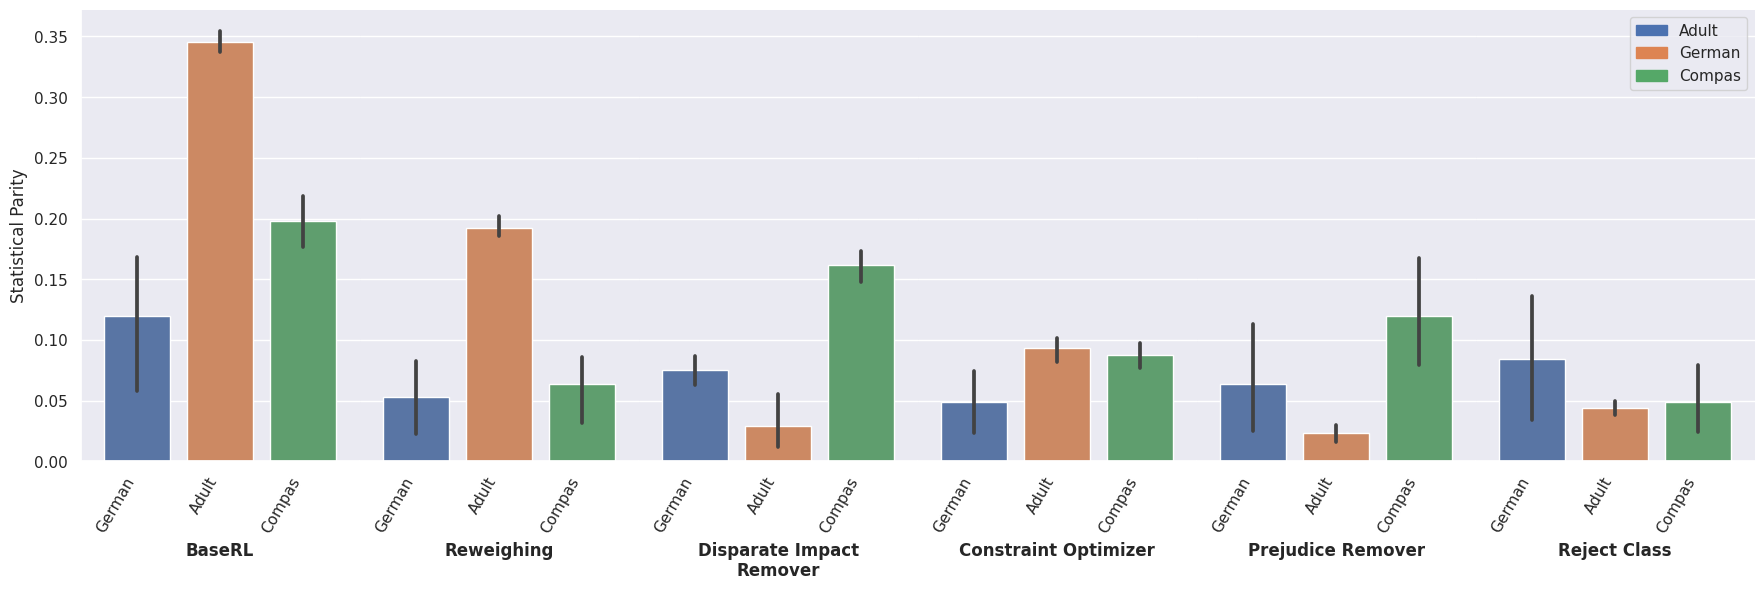

In [9]:
method_names = ["BaseRL","Reweighing", "Disparate Impact\nRemover", "Constraint Optimizer", "Prejudice Remover", "Reject Class"]
data_names = ["Adult", "German", "Compas"]
# Falta selecionar o best of Disparate Impact, Constraint Optimize e Prejudice Remover
# Também falta separar o Reweighing in NO reweighin e with reweighing

colors = sns.color_palette("deep", len(data_names))

df["Statistical Parity"] = df["Statistical Parity"].apply(abs)

plt.figure(figsize=(9, 8))
g = sns.catplot(
    data=df, x="Data_Name", y="Statistical Parity", col="Method",
    kind="bar", height=6, aspect=0.5
)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
g.set_xticklabels(rotation=60, horizontalalignment='right')
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel(method_names[i], fontdict={'weight': 'bold'})
    ax.set_title('')
    ax.margins(x=0.1) 

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, data_names, loc="upper right", bbox_to_anchor=(1, 1))

plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.savefig("teste.png")

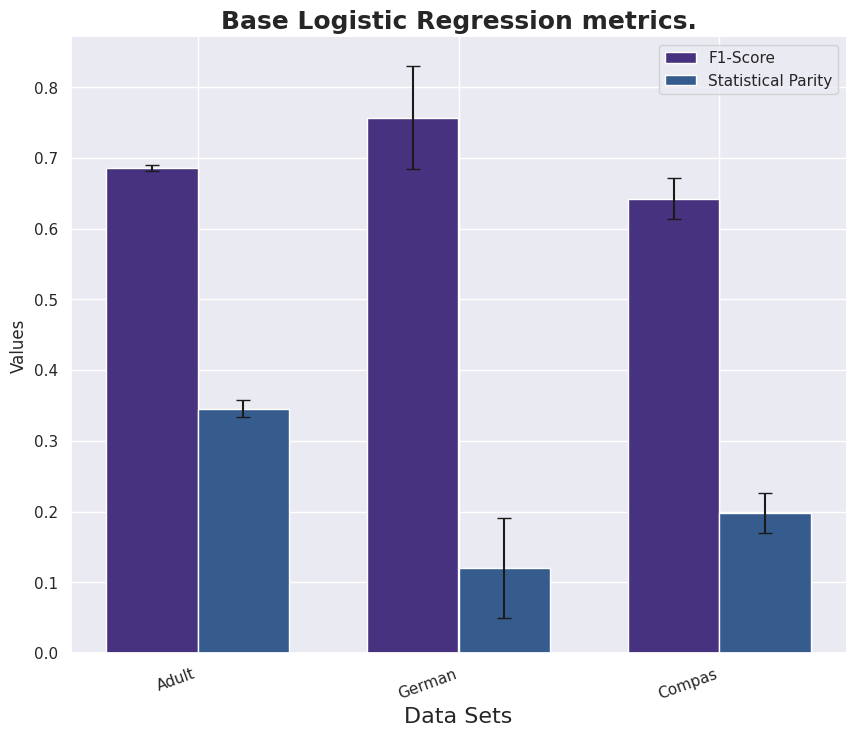

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "BaseRL"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))
sns.set(style="darkgrid")
sns.set_palette("viridis")
sns.despine()
barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right' )
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 12)
ax.set_title('Base Logistic Regression metrics.', fontsize = 18, fontweight = 'bold')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância


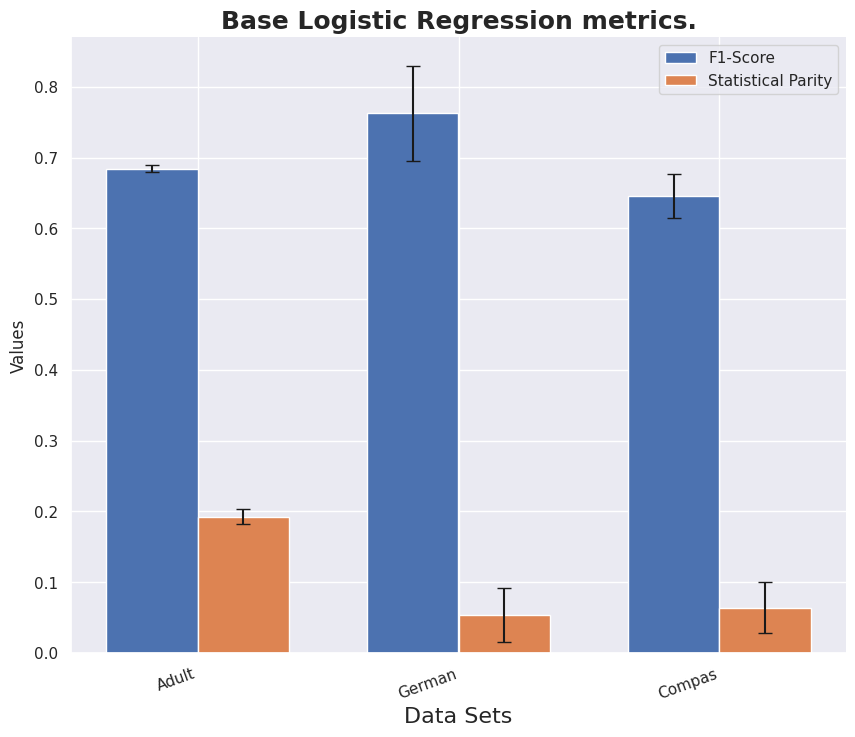

In [13]:
# Modelo simples
# Dados de exemplo
categorias = ["Adult", "German", "Compas"]
df_method = df[df['Method'] == "Reweighing"]

metrica1 = []
dp1 = []
metrica2 = []
dp2 = []

for name in categorias:
    metrica1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].mean())  
    dp1.append(df_method.loc[df['Data_Name'] == name]['F1-Score'].std()) 
    metrica2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].mean())
    dp2.append(df_method.loc[df['Data_Name'] == name]['Statistical Parity'].std())

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras no eixo x
posicao_metrica1 = np.arange(len(categorias))
posicao_metrica2 = posicao_metrica1 + largura_barra

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize = (10,8))
sns.set(style="darkgrid")
sns.despine()
barra1 = ax.bar(posicao_metrica1, metrica1, largura_barra, label='F1-Score' , yerr = dp1, capsize = 5)
barra2 = ax.bar(posicao_metrica2, metrica2, largura_barra, label='Statistical Parity', yerr = dp2, capsize = 5)

# Configurar os rótulos do eixo x e o título do gráfico
ax.set_xticks(posicao_metrica1 + largura_barra / 2)
ax.set_xticklabels(categorias,rotation=20, horizontalalignment='right' )
ax.set_xlabel('Data Sets', fontsize = 16)
ax.set_ylabel('Values', fontsize = 12)
ax.set_title('Base Logistic Regression metrics.', fontsize = 18, fontweight = 'bold')

# Adicionar legenda
ax.legend()

# Mostrar o gráfico
plt.show()

#Mudanças -> Aumentar o título, a legenda botar data set e titulo em bold e adicionar variância
